# Install and load all libraries

In [1]:
from ml_utils import *
from fastai.vision.all import *

/home/bilal/mlworks/surgtoolloc/ml_utils.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  images_df=pd.read_csv('data/images_df_final.csv', dtype={'image_id':str,'clip_name':str,'labels':str})


# Create the datablock


### Loading the preprocessed data frame

In [2]:
images_df.sample(n=5)

,image_id,clip_name,labels,valid,y1_label,y2_label,y3_label,y4_label
599176,data/train_images_c/clip_004962/01230.jpg,clip_004962,"bipolar_forceps,nan,monopolar_curved_scissors,cadiere_forceps",False,bipolar_forceps,nan,monopolar_curved_scissors,cadiere_forceps
2070479,data/train_images_c/clip_017152/00120.jpg,clip_017152,"bipolar_forceps,nan,vessel_sealer,grasping_retractor",True,bipolar_forceps,nan,vessel_sealer,grasping_retractor
1051615,data/train_images_c/clip_008709/00780.jpg,clip_008709,"needle_driver,nan,needle_driver,grasping_retractor",False,needle_driver,nan,needle_driver,grasping_retractor
340752,data/train_images_c/clip_002821/00840.jpg,clip_002821,"needle_driver,nan,needle_driver,cadiere_forceps",False,needle_driver,nan,needle_driver,cadiere_forceps
2012374,data/train_images_c/clip_016672/01035.jpg,clip_016672,"needle_driver,nan,needle_driver,prograsp_forceps",False,needle_driver,nan,needle_driver,prograsp_forceps


### Datablock and dataloaders

In [3]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab),CategoryBlock(vocab=vocab)),
    n_inp=1,
    get_x=ColReader('image_id'),
    get_y=[ColReader('y1_label'),ColReader('y2_label'),ColReader('y3_label'),ColReader('y4_label')],
    splitter=splitter,
    item_tfms=Resize((180,320), method='squish'),
    batch_tfms=[*aug_transforms(size=(180,320), min_scale=1),Normalize.from_stats(*imagenet_stats)]
).dataloaders(images_df, seed=42, n_workers=32)

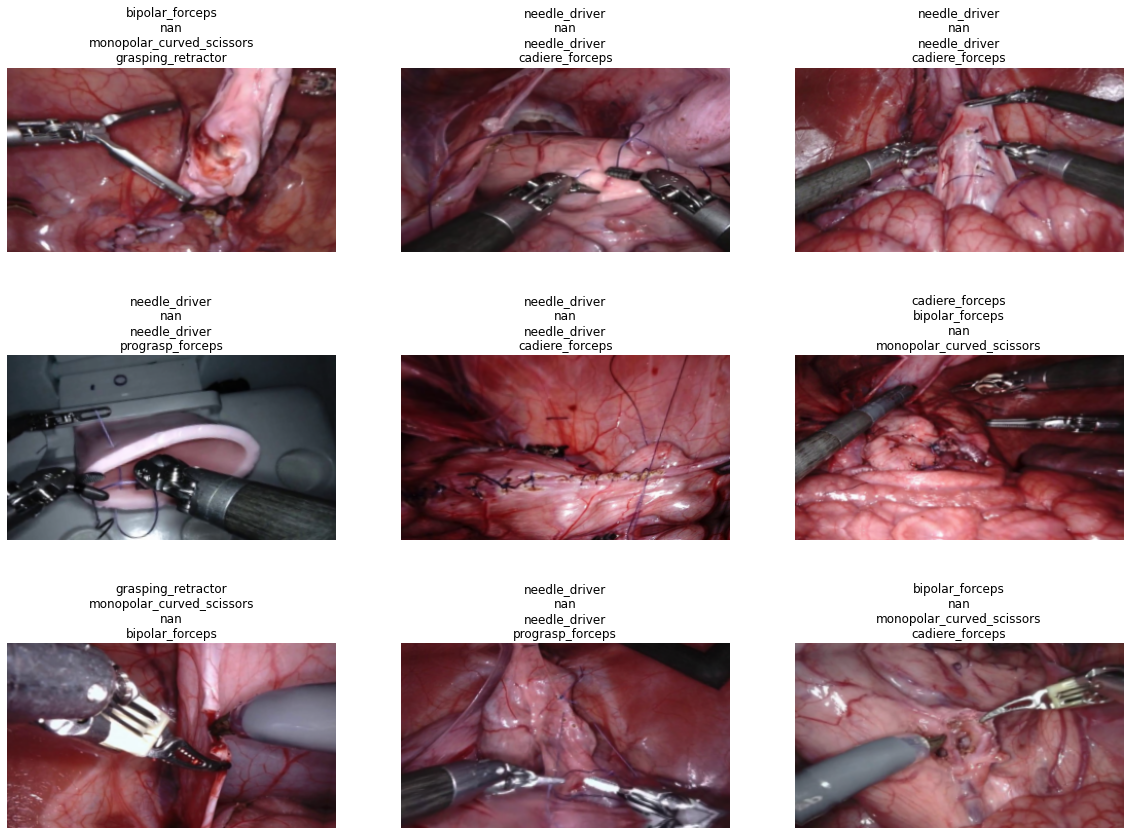

In [4]:
dls.show_batch(figsize=(20,15))

In [5]:
learn = vision_learner(dls, 'convnext_small_in22k', loss_func=combo_loss, metrics=metrics_cfg, n_out=cfg(4)).to_fp16()
learn.fine_tune(5, 0.01)

epoch,train_loss,valid_loss,usm1_loss,usm2_loss,usm3_loss,usm4_loss,usm1_err,usm2_err,usm3_err,usm4_err,combo_err,time
0,0.419072,0.320621,0.083507,0.050014,0.071546,0.115553,0.026269,0.013660,0.020873,0.035501,0.096302,1:52:18


epoch,train_loss,valid_loss,usm1_loss,usm2_loss,usm3_loss,usm4_loss,usm1_err,usm2_err,usm3_err,usm4_err,combo_err,time
0,0.094538,0.166301,0.032149,0.024189,0.048647,0.061316,0.006960,0.004928,0.009425,0.012917,0.034231,2:29:56
1,0.042874,0.169759,0.035162,0.021193,0.047407,0.065997,0.005915,0.003430,0.008519,0.010756,0.028619,2:30:05
2,0.021990,0.180105,0.033002,0.023289,0.058549,0.065266,0.004353,0.002882,0.007743,0.008643,0.023621,2:30:05
3,0.006266,0.182156,0.032995,0.022161,0.056610,0.070391,0.004258,0.002669,0.007629,0.007942,0.022498,2:30:01
4,0.008997,0.182844,0.032262,0.021427,0.058746,0.070409,0.004043,0.002602,0.007596,0.007753,0.021994,2:29:44


In [6]:
learn = vision_learner(dls, 'convnext_small_in22k', loss_func=combo_loss, metrics=metrics_cfg, n_out=cfg(4)).to_fp16()
learn.fine_tune(5, 0.01)

epoch,train_loss,valid_loss,usm1_loss,usm2_loss,usm3_loss,usm4_loss,usm1_err,usm2_err,usm3_err,usm4_err,combo_err,time
0,0.488015,0.322854,0.085772,0.049051,0.072236,0.115795,0.026139,0.012440,0.020166,0.033757,0.092502,1:52:24


epoch,train_loss,valid_loss,usm1_loss,usm2_loss,usm3_loss,usm4_loss,usm1_err,usm2_err,usm3_err,usm4_err,combo_err,time
0,0.078122,0.154501,0.028182,0.022148,0.042601,0.061570,0.007255,0.004856,0.009248,0.012250,0.033609,2:29:52
1,0.046455,0.178445,0.036205,0.025059,0.049231,0.067949,0.006413,0.004236,0.008447,0.009941,0.029037,2:30:12
2,0.039367,0.196718,0.030716,0.024004,0.061117,0.080881,0.004591,0.003194,0.008118,0.009196,0.025099,2:30:21
3,0.017861,0.182222,0.032732,0.021474,0.056598,0.071419,0.004343,0.002988,0.008023,0.007927,0.023281,2:30:11
4,0.004909,0.192092,0.031197,0.022771,0.060515,0.077608,0.004214,0.002902,0.007991,0.008080,0.023187,2:30:04


In [ ]:
learn = vision_learner(dls, 'convnext_small_in22k', loss_func=combo_loss, metrics=metrics_cfg, n_out=cfg(4)).to_fp16()
learn.fine_tune(5, 0.01)

The training seems pretty stable. All iterations of the same model produced the final error rate range of 35->0.3, 0.6 and 0.7 which is reasonably a small difference.